In [3]:
import numpy as np 
import pandas as pd 
from scipy import stats 
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)
batch_a = np.random.normal(loc=450, scale=10, size=30)
batch_b = np.random.normal(loc=458, scale=12, size=30)



In [12]:
 #Welch’s t-test (unequal variances assumed)
t_stat, p_val = stats.ttest_ind(batch_a, batch_b, equal_var=False)

print(f"Batch A Mean: {batch_a.mean():.2f} MPa")
print(f"Batch B Mean: {batch_b.mean():.2f} MPa")
print(f"P-value (Welch t-test): {p_val:.4f}")



Batch A Mean: 448.12 MPa
Batch B Mean: 456.55 MPa
P-value (Welch t-test): 0.0022


In [10]:

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - margin, mean + margin

ci_a = confidence_interval(batch_a)
ci_b = confidence_interval(batch_b)

print(f"Batch A 95% CI: {ci_a}")
print(f"Batch B 95% CI: {ci_b}")


Batch A 95% CI: (np.float64(444.7578518103516), np.float64(451.47921027262754))
Batch B 95% CI: (np.float64(452.3738990611065), np.float64(460.7182016519349))


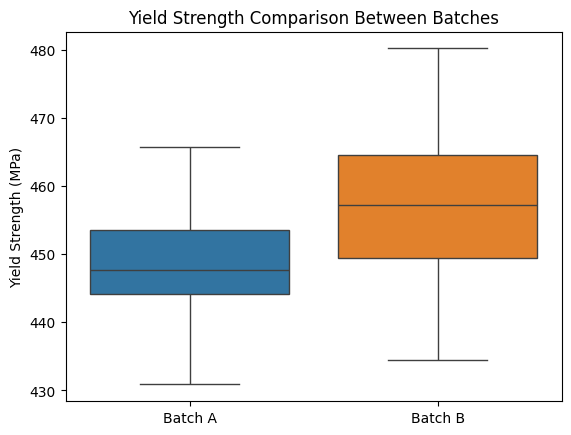

In [11]:
sns.boxplot(data=[batch_a, batch_b])
plt.xticks([0, 1], ['Batch A', 'Batch B'])
plt.ylabel("Yield Strength (MPa)")
plt.title("Yield Strength Comparison Between Batches")
plt.show()
